# Exercice complet (1H):
Ce travail va donner lieu à des présentations. Le but est de réaliser un notebook par groupe que vous présenterez ensuite aux autres (10 minutes par groupes). Vous devez faire des analyses judicieuses et pertinantes en dégagant du sens des données. Un exemple d'analyse : Vous pouvez calculer des températures par mois et tirer des conclusions de votre analyse (climat tropical ectect). Vour devez analyser les variables séparement et ensemble. N'hésitez pas à utiliser l'intégralité des éléments vue en cours. 
* Charger le jdd weather et faire des statistiques descriptives completes.
* Réaliser des analyses par dates (mois, jours etc)
* Réaliser des graphiques pour illustrer vos propos
* Pensez a faire des analyses de distribution, des corrélations...

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chargement et visualisation du jeu de données Weather

In [26]:
weather = pd.read_csv("weather.csv", sep = ',') 
weather.head()

,date,precip_type,temperatureM24,humidity,wind_speed,wind_bearing,visibility,pressure,temperature
0,2005-12-31T23:00:00Z,rain,0.577778,0.89,17.1143,140,9.9820,1016.66,5.422222
1,2006-01-01T00:00:00Z,rain,1.161111,0.85,16.6152,139,9.9015,1016.15,2.350000
2,2006-01-01T01:00:00Z,rain,1.666667,0.82,20.2538,140,9.9015,1015.87,5.422222
3,2006-01-01T02:00:00Z,rain,1.711111,0.82,14.4900,140,9.9015,1015.56,5.905556
4,2006-01-01T03:00:00Z,rain,1.183333,0.86,13.9426,134,9.9015,1014.98,5.966667


# Caractéristiques du dataframe

In [74]:
weather.info()

# 9 variables / pas de Nan / 96 429 lignes / variable date au format string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96429 entries, 0 to 96428
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   date            96429 non-null  datetime64[ns, UTC]
 1   precip_type     95912 non-null  object             
 2   temperatureM24  96429 non-null  float64            
 3   humidity        96429 non-null  float64            
 4   wind_speed      96429 non-null  float64            
 5   wind_bearing    96429 non-null  int64              
 6   visibility      96429 non-null  float64            
 7   pressure        96429 non-null  float64            
 8   temperature     96429 non-null  float64            
 9   year            96429 non-null  int64              
 10  month           96429 non-null  int64              
 11  quarter         96429 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(6), int64(4), object(1)
memory usage: 8.8+ MB


In [28]:
# Compter le nombre de valeurs manquantes par colonne
weather.isna().sum()

# 517 valeurs manquantes dans precip_type => nous laissons le jeu de données tel quel

date                0
precip_type       517
temperatureM24      0
humidity            0
wind_speed          0
wind_bearing        0
visibility          0
pressure            0
temperature         0
dtype: int64

# Période analysée

In [29]:
print(weather.sort_values("date").iloc[0,0])
print(weather.sort_values("date", ascending = False).iloc[0,0])

2005-12-31T23:00:00Z
2016-12-30T22:00:00Z


In [30]:
# La date est au format string, nous la convertissons en format date
weather['date'] = pd.to_datetime(weather['date'], format='%Y-%m-%d')
weather['date'].dtypes

datetime64[ns, UTC]

# Principales statistiques

In [31]:
weather.describe()

,temperatureM24,humidity,wind_speed,wind_bearing,visibility,pressure,temperature
count,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000,96429.000000
mean,11.935630,0.734861,10.810652,187.509546,10.348078,1003.231678,11.934684
std,9.550868,0.195481,6.914372,107.396524,4.192284,116.984147,9.551832
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.000000,-21.822222
25%,4.705556,0.600000,5.828200,116.000000,8.355900,1011.900000,4.694444
50%,12.011111,0.780000,9.965900,180.000000,10.046400,1016.440000,12.011111
75%,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000,18.838889
max,39.905556,1.000000,63.852600,359.000000,16.100000,1046.380000,39.905556


# Jour le plus chaud et le plus froid

In [71]:
hot_day = weather[weather.temperature == weather.temperature.max()]
print(f'Le jour le plus chaud est le {hot_day.iloc[:,0]}', "\n")

cold_day = weather[weather.temperature == weather.temperature.min()]
print(f'Le jour le plus froid est le {cold_day.iloc[:,0]}')

Le jour le plus chaud est le 13598   2007-07-21 13:00:00+00:00
Name: date, dtype: datetime64[ns, UTC] 

Le jour le plus froid est le 53551   2012-02-09 06:00:00+00:00
Name: date, dtype: datetime64[ns, UTC]


# Représentation type de précipitations

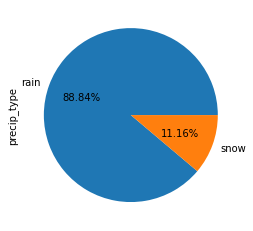

In [32]:
weather['precip_type'].value_counts().plot.pie(autopct = "%.2f%%")

# Visualisation variables quantitatives

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001638151A3D0>,
      dtype=object)

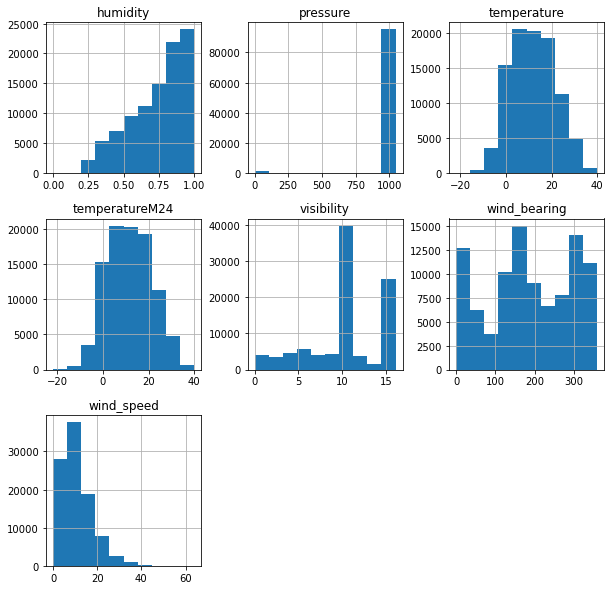

In [33]:
weather.hist(figsize = (10,10))

# climat assez tempéré / plutôt humide / pression importante / visibilité 10,11,15,16 / wind_bearing ne faiblit pas sous 400 / 
# vent assez faible

# Matrice de corrélation

In [34]:
weather.corr()

,temperatureM24,humidity,wind_speed,wind_bearing,visibility,pressure,temperature
temperatureM24,1.000000,-0.632179,0.008947,0.029988,0.392724,-0.005403,0.945473
humidity,-0.632179,1.000000,-0.224959,0.000738,-0.369085,0.005426,-0.590944
wind_speed,0.008947,-0.224959,1.000000,0.103820,0.100752,-0.049263,-0.046741
wind_bearing,0.029988,0.000738,0.103820,1.000000,0.047589,-0.011650,0.016383
visibility,0.392724,-0.369085,0.100752,0.047589,1.000000,0.059850,0.366624
pressure,-0.005403,0.005426,-0.049263,-0.011650,0.059850,1.000000,-0.000290
temperature,0.945473,-0.590944,-0.046741,0.016383,0.366624,-0.000290,1.000000


Text(0.5, 1.0, 'Matrice de corrélation entre les différentes caractéristiques de weather\n')

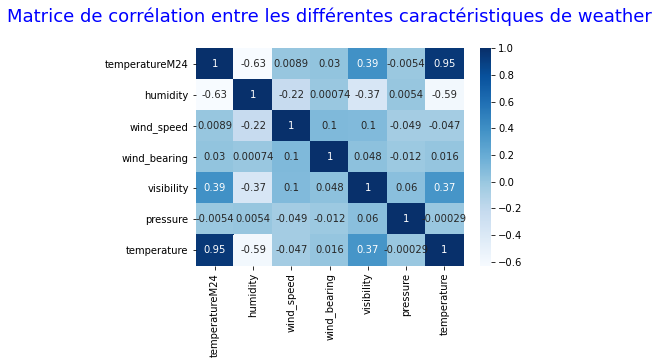

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(weather.corr(), annot=True, cmap='Blues')
plt.title("Matrice de corrélation entre les différentes caractéristiques de weather\n", fontsize=18, color='Blue')

# Forte corrélation entre temperature et temperature M24 puis temperature et visibilité

# Représentation de la température moyenne

In [36]:
# Création colonnes année
weather["year"] = weather["date"].dt.year

In [37]:
# Création colonnes mois
weather["month"] = weather["date"].dt.month

In [38]:
# Température moyenne par année et mois
weather.groupby(['year','month']).mean()['temperature'].unstack(level = 0)

# Nous nous rendons compte que nous n'avons que les données à partir de décembre pour 2005

year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,,,,
1,NaN,-1.872334,4.941674,1.119198,-0.968369,-1.753726,0.162470,0.916644,1.487351,2.584954,2.535335,0.274724
2,NaN,-0.086425,5.052604,4.281849,2.033333,1.929282,-0.037409,-4.741339,2.990327,5.362293,2.659301,6.376772
3,NaN,5.050343,8.408333,7.096602,6.903315,6.765599,6.389180,7.845594,4.627285,9.752666,7.311895,7.754749
4,NaN,12.619267,12.385756,12.055170,14.680239,12.494514,13.406443,13.127824,13.678225,13.061096,11.868349,13.288086
5,NaN,15.678569,17.775314,17.412298,17.811313,16.477897,17.130130,17.048126,16.925680,15.904861,17.277158,16.489471
6,NaN,19.557353,22.119020,21.557315,19.845417,20.601466,20.990332,22.570617,20.273719,20.125741,20.517477,21.513534
7,NaN,23.803584,23.591764,21.991278,23.332452,23.116069,21.635215,24.420490,22.783109,22.065250,23.675217,22.715644
8,NaN,19.147327,23.264710,22.407699,22.794855,21.387124,23.070019,23.627337,23.019743,20.624388,23.998111,21.322424
9,NaN,18.254645,14.431767,15.677909,19.326968,15.404583,19.860872,19.365139,15.115378,17.137955,17.843958,18.365278


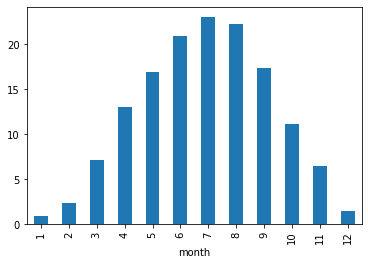

In [39]:
# Température moyenne par mois
temp_mois = weather.groupby('month').mean()['temperature']
temp_mois.plot(kind='bar', subplots=False)

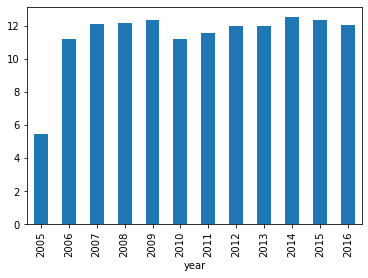

In [40]:
# Température moyenne par année
temp_annee = weather.groupby('year').mean()['temperature']
temp_annee.plot(kind='bar', subplots=False)

# Année 2005 biaisée, car ne contient que les données de décembre.
# Année 2010 la plus fraiche

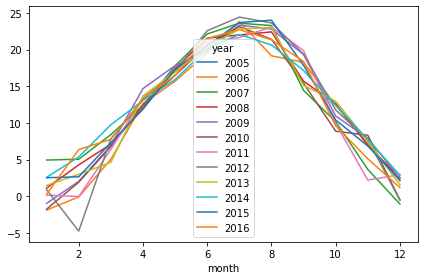

In [20]:
# Température moyenne par année et mois
temp_annee = weather.groupby(['year','month']).mean()['temperature'].unstack(level = 0)

temp_annee.plot(kind = 'line', subplots = False)
plt.tight_layout() #place les légendes à des endroits plus pertinents

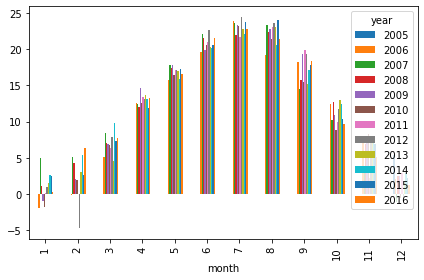

In [21]:
temp_annee.plot(kind='bar', subplots=False)
plt.tight_layout()

In [56]:
# Création colonne trimestre
weather["quarter"] = weather["date"].dt.quarter
weather.head()

# Température moyenne par année et trimestre (pour une meilleure lisibilité)
temp_anneetrim = weather.groupby(['quarter','year']).mean()['temperature'].unstack(level = 0)
temp_anneetrim

quarter,1,2,3,4
year,,,,
2005,NaN,NaN,NaN,5.422222
2006,1.067760,15.948728,20.425191,7.247157
2007,6.170257,17.430528,20.494605,4.268285
2008,4.163334,17.012701,20.072886,7.372970
2009,2.676852,17.449674,21.845169,7.092389
2010,2.326533,16.524112,20.033587,5.539845
2011,2.245041,17.175135,21.540092,5.063338
2012,1.473962,17.576320,22.504748,6.298583
2013,3.036476,16.958840,20.362497,7.335809


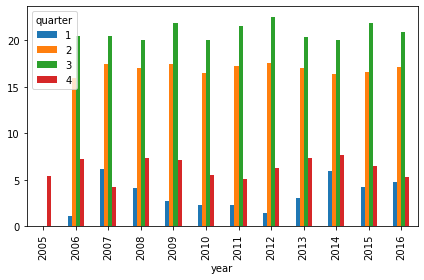

In [57]:
temp_anneetrim.plot(kind='bar', subplots=False)
plt.tight_layout()

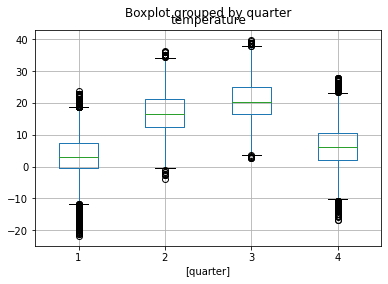

In [72]:
# Faire un box plot de la taille de Sépal par espèce.
weather_temp_quarter = weather[['temperature', 'quarter']]
weather_temp_quarter.boxplot(by = 'quarter')

# Nombre de jours de pluie par année

In [102]:
weather_pluie = weather[weather.precip_type == 'rain']
weather_pluie = weather_pluie.groupby(['year']).count()['precip_type']/24
weather_pluie

year
2005      0.041667
2006    311.166667
2007    333.958333
2008    332.708333
2009    322.583333
2010    310.583333
2011    306.750000
2012    305.916667
2013    322.291667
2014    344.666667
2015    338.833333
2016    321.041667
Name: precip_type, dtype: float64

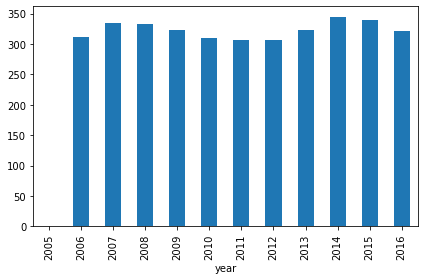

In [103]:
weather_pluie.plot(kind='bar', subplots=False)
plt.tight_layout()

# Nombre de jours de neige par année

In [104]:
weather_neige = weather[weather.precip_type == 'snow']
weather_neige = weather_neige.groupby(['year']).count()['precip_type']/24
weather_neige

year
2006    53.833333
2007    31.041667
2008    33.291667
2009    42.416667
2010    55.416667
2011    58.250000
2012    54.125000
2013    42.708333
2014    20.208333
2015    26.166667
2016    28.333333
Name: precip_type, dtype: float64

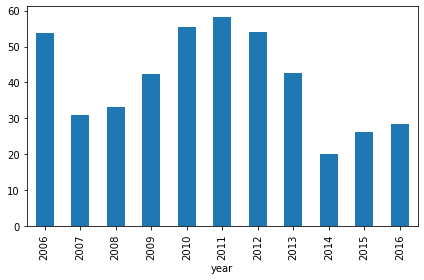

In [106]:
weather_neige.plot(kind='bar', subplots=False)
plt.tight_layout()

# Représentation de la vitesse du vent par mois

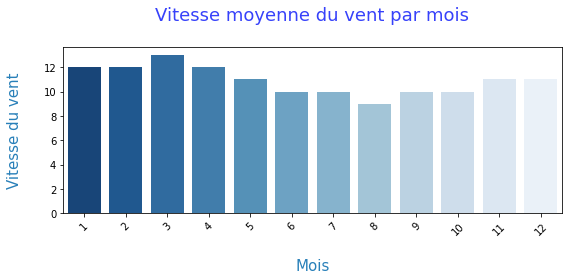

In [23]:
temp_mois = weather[['wind_speed','month']].groupby('month').mean().round().sort_values(by='wind_speed', ascending=False)
temp_mois.reset_index(0, inplace=True)
temp_mois.head()


plt.figure(figsize=(8,4))
sns.barplot(x=temp_mois['month'], y=temp_mois['wind_speed'], palette="Blues_r")
plt.xlabel('\nMois', fontsize=15, color='#2980b9')
plt.ylabel('Vitesse du vent\n', fontsize=15, color='#2980b9')
plt.title("Vitesse moyenne du vent par mois\n", fontsize=18, color='#3742fa')
plt.xticks(rotation= 45)
plt.tight_layout()